### Recap:

We explored how a visual representation of data can help us reach observations about data more quickly than a table representation of the same data. We learned how to work with the pyplot module, which provides a high-level interface to the matplotlib library, to create and customize a line chart of unemployment data. To look for potential seasonality, we started by creating a line chart of unemployment rates from 1948.

Now, we'll dive a bit deeper into matplotlib to learn how to create multiple line charts to help us compare monthly unemployment trends across time. The unemployment dataset contains 2 columns:
- DATE: date, always the first of the month. Examples:
    - 1948-01-01: January 1, 1948.
    - 1948-02-01: February 1, 1948.
    - 1948-03-01: March 1, 1948.
    - 1948-12-01: December 1, 1948.
- VALUE: the corresponding unemployment rate, in percent.

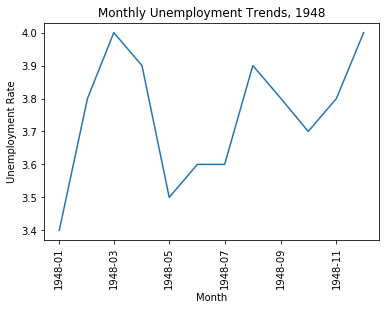

In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset and convert "DATE" column to datetime onject
unrate = pd.read_csv("data/unrate.csv")
unrate["DATE"] = pd.to_datetime(unrate["DATE"])

# Assign the values
x_values = unrate["DATE"].head(12)
y_values = unrate["VALUE"].head(12)

# Add the chart info
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

# Display the plot
plt.plot(x_values,y_values)
plt.show()

### Matplotlib Classes

Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:
- a container for all plots was created (returned as a Figure object)
- a container for the plot was positioned on a grid (the plot returned as an Axes object)
- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. We can manually create a figure by calling `pyplot.figure()`:

```
fig = plt.figure()
```

After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot. The Axes object acts as its own container for the various components of the plot, such as:
- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
    - markers
    - lines
    - gridlines
    
While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use `Figure.add_subplot`. This will return a new Axes object, which needs to be assigned to a variable:

```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```

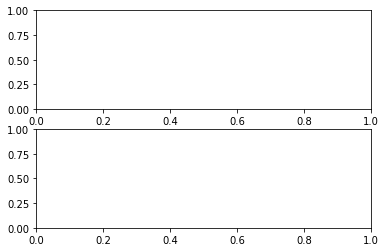

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

### Grid Positioning

For each subplot, matplotlib generated a coordinate grid that was similar to the one we generated using the `plot()` function:
- the x-axis and y-axis values ranging from 0.0 to 1.0
- no gridlines
- no data
The main difference is that this plot ranged from 0.0 to 1.0 instead of from -0.06 to 0.06, which is a quirk suggested by a difference in default properties.
Here's a diagram that demonstrates how a 2 by 2 subplot layout would look like:
<img src="_images/multiple_subplots.png" />

In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.
<img src="_images/subplot_grid.png" />

### Adding Data

To generate a line chart within an Axes object, we need to call `Axes.plot()` and pass in the data you want plotted:
```
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)
```

Like `pyplot.plot()`, the `Axes.plot()` will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call `Axes.plot()` and pass in the data we want to use in that plot.

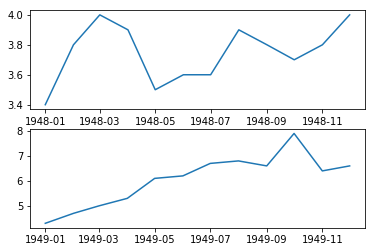

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 1948 data
x_values = unrate["DATE"].head(12)
y_values = unrate["VALUE"].head(12)
ax1.plot(x_values, y_values)

# 1949 data
x_values = unrate["DATE"][12:24]
y_values = unrate["VALUE"][12:24]
ax2.plot(x_values, y_values)

plt.show()

### Formatting And Spacing

One issue with the 2 plots is that the x-axis ticks labels are unreadable and hence skipped the even months. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same.

This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the `figsize` parameter when we call `plt.figure()`:

This parameter takes in a tuple of floats:

```
fig = plt.figure(figsize=(width, height))
```

The unit for both width and height values is inches. The `dpi` parameter, or dots per inch, and the `figsize` parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues.

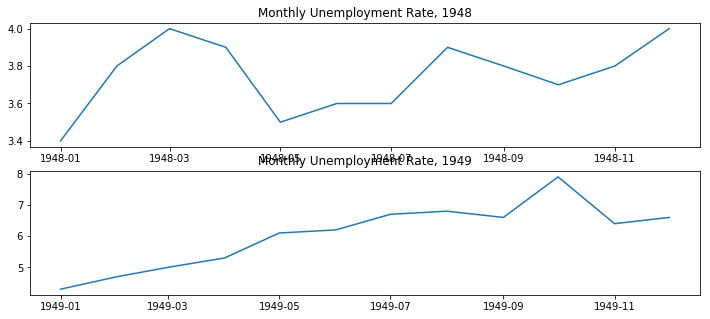

In [4]:
# Modified code with figure size formatting and Spacing

fig = plt.figure(figsize=(12, 5)) # set the width of the plotting area to 12 inches and the height to 5 inches.
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# 1948 data
x_values = unrate["DATE"].head(12)
y_values = unrate["VALUE"].head(12)
ax1.plot(x_values, y_values)
ax1.set_title("Monthly Unemployment Rate, 1948")

# 1949 data
x_values = unrate["DATE"][12:24]
y_values = unrate["VALUE"][12:24]
ax2.plot(x_values, y_values)
ax2.set_title("Monthly Unemployment Rate, 1949")
plt.show()

Instead of having to rotate the x-axis tick labels, we were able to horizontally extend the entire plotting area to make the labels more readable. Because the goal is to be able to look for any visual similarities between the lines in the plots, we want the space between the 2 plots to be as small as possible.

### Comparing Across More Years

We're going to visualize data from a few more years to see if we find any evidence for seasonality between those years. Because we're going to need to plot multiple years, we can use a loop so that we're not repeating unnecessary code. In order to generate values for the loop, we'll use Python's range() function, which produces a list of numbers.

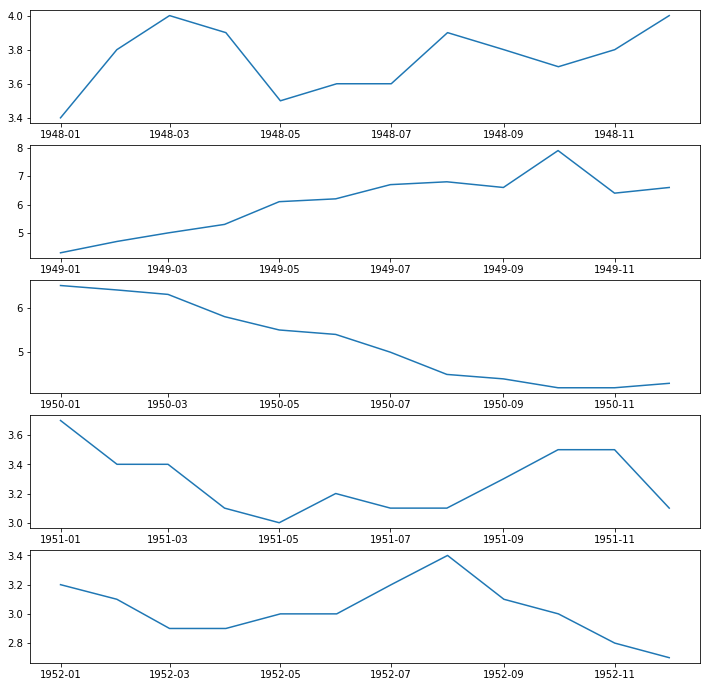

In [5]:
fig = plt.figure(figsize=(12, 12)) # (weight, height)
for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset["DATE"], subset["VALUE"])

plt.show()

### Overlaying Line Charts

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the `DATE` column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the DATE column and assign them to a new column, we can use the `pandas.Series.dt` accessor:

```
unrate['MONTH'] = unrate['DATE'].dt.month
```

If we call `pyplot.plot()` multiple times, matplotlib will generate the line charts on the single subplot.

```
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the `c` parameter when calling plot():

```
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
```

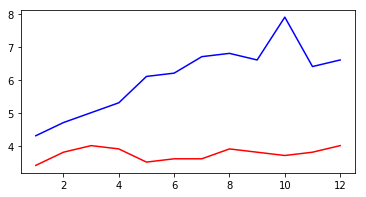

In [6]:
# Overlaying Two Line Charts
unrate["MONTH"] = unrate["DATE"].dt.month

fig = plt.figure(figsize=(6, 3))

plt.plot(unrate["MONTH"][:12], unrate["VALUE"][:12], c='red')
plt.plot(unrate["MONTH"][12:24], unrate["VALUE"][12:24], c='blue')

plt.show()

### Adding more lines

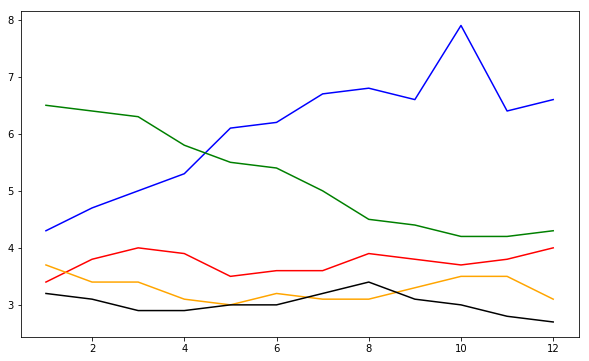

In [7]:
# Overlaying Five Line charts
fig = plt.figure(figsize=(10, 6))

plt.plot(unrate["MONTH"][:12], unrate["VALUE"][:12], c='red')
plt.plot(unrate["MONTH"][12:24], unrate["VALUE"][12:24], c='blue')
plt.plot(unrate["MONTH"][24:36], unrate["VALUE"][24:36], c='green')
plt.plot(unrate["MONTH"][36:48], unrate["VALUE"][36:48], c='orange')
plt.plot(unrate["MONTH"][48:60], unrate["VALUE"][48:60], c='black')

plt.show()

By plotting all of the lines in one coordinate grid, we got a different perspective on the data. The main thing that sticks out is how the blue and green lines span a larger range of y values (4% to 8% for blue and 4% to 7% for green) while the 3 plots below them mostly range only between 3% and 4%. You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

### Adding A Legend

To help remind us which year each line corresponds to, we can add a __legend__ that links each color to the year the line is representing.

When we generate each line chart, we need to specify the text label we want each color linked to. The `pyplot.plot()` function contains a `label` parameter, which we use to set the year value:
```
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')
```

We can create the legend using `pyplot.legend` and specify its location using the `loc` parameter:
```
plt.legend(loc='upper left')
```

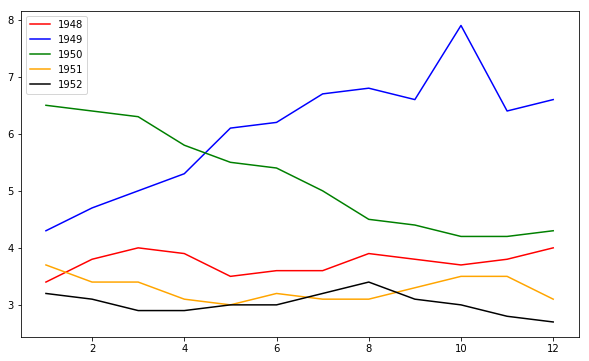

In [8]:
fig = plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'black']
years = ['1948', '1949', '1950', '1951', '1952']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset["MONTH"], subset["VALUE"], c=colors[i], label=years[i])

plt.legend(loc='upper left')    
plt.show()

### Final Tweaks

Let's enhance the visualization by adding a title and labels for both axes. To set the title, we use `pyplot.title()` and pass in a string value:
```
plt.title("Monthly Unemployment Trends, 1948-1952")
```
To set the x-axis and y-axis labels, we use `pyplot.xlabel()` and `pyplot.ylabel()`. Both of these functions accept string values.

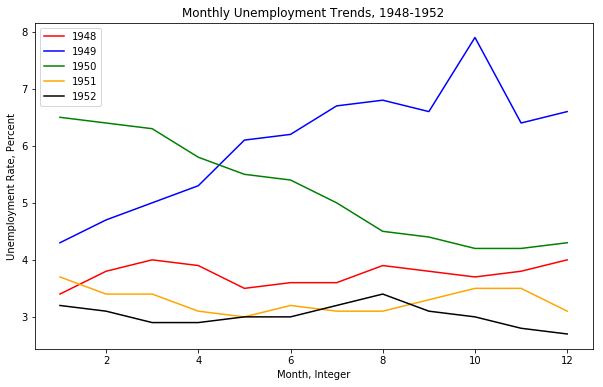

In [9]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
    
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

## Conclusion:

We learned about the important matplotlib building blocks and used them to experiment with creating multiple line charts.